<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Redes Neurais com PyTorch
---



Classificação Multiclasse
- Introdução
- Softmax
- Classificação de Imagens
- Conceito de Dissipação de Gradiente
- Funções de ativação tangente hiperbólica e ReLU

## Introdução

- Muitos problemas de classificação possuem mais do que uma classe. Por ex. ao classificar imagens de dígitos temos 10 classes (dígitos de 0 a 9), ou ao classificar imagens de produtos de moda (camisetas, camisas, calças, bolsas, etc.) também temos mais do que duas classes.

- Poderíamos pensar que, a saída da rede neural poderia ser dividia de forma equidistante para cada classe. Por exemplo, em um problema de 3 classes, poderiamos dividir a saída 0 a 1 em:
    - 0.0 para classe 1 (dog);
    - 0.5 para classe 2 (cat);
    - 1.0 para classe 3 (horse).
    
- Essa abordagem não tras bons resultados, ainda mais à medida que o número de classes aumenta.

- Para tratar este problema é necessário utilizar uma outra função de ativação na última camada: *Softmax*.

- Para que Redes Neurais possam ser usadas em problemas de classificação de múltiplas classes é necessário criar um neurônio de saída para cada classe.

- Um exemplo de uma rede neural com três neurônios na camada de saída é apresentado na figura abaixo:

<div align="center"><img src="img/neural_network_multiclass_1.svg" width=100%></div>

## Softmax

Ao utilizar um neurônio de saída para cada classe teremos um número entre 0 e 1 para cada um deles. Poderíamos pensar que esse valor já poderia ser a probabilidade de cada classe acontecer, mas vamos ver um exemplo:

**Situação 1**: neste exemplo de 3 classes, vamos supor que para uma determinada de dados a saída fosse $[0.9,0.1,0.2]$. Podemos pensar que esse $0.9$ corresponde à probabilidade de ser da classe 1, no entanto a soma de todas as saídas é $1.2$, portanto, não pode corresponder a um valor de probabilidade.

**Situação 2**: vamos supor que para uma outra entrada a saída $[0.7, 0.7, 0.2]$. Além de a soma ser mais do que 1, temos as classes 1 e 2 em um empate com valor 0.7. A probabilidade de ambas deveria ser a mesma, mas não poderia ser 0.7, já que a soma de ambas daria um valor maior do que 1.    

- Para resolver esse problema existe a função *Softmax*

- Esta função permite transformar as saídas da rede neural em valores de probabilidades. A função matemática que permite transformar o vetor dessa saída da rede em uma distribuição de probabilidades é a seguinte:

$$
\text{softmax}(y_i) = \cfrac{e^{y_i}}{\sum_i{e^{y_i}}}
$$

- onde $y_i$ é o valor de saída do neurônio da classe $i$. 

- No numerador temos a função exponencial de $y_i$, que retorna algum valor positivo.

- No denominador temos a soma das funções exponenciais dos valores de saída para todas as classes, que também será um valor positivo.

- Essa relação entre o numerador de denominador faz com que a soma de todas as saídas de probabilidade seja 1.

Podemos definir a nossa função em Python para realizar esse cálculo

In [2]:
import torch 
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x))

- As probabilidades para a saída $[0.9, 0.1, 0.2]$ seriam:

In [3]:
out = torch.tensor([0.9, 0.1, 0.2])
probabilities = softmax(out)
probabilities

tensor([0.5139, 0.2309, 0.2552])

- As probabilidades para a saída $[0.7, 0.7, 0.2]$ seriam:

In [4]:
out = torch.tensor([0.7, 0.7, 0.2])
probabilities = softmax(out)
probabilities

tensor([0.3837, 0.3837, 0.2327])

### Rede Neural com Saída Softmax

<div align="center"><img src="img/neural_network_multiclass_1b.svg" width=100%></div>

Em termos de implementação em Pytorch a nossa rede ficaria da seguinte forma:

In [5]:
from torch import nn
import torch.nn.functional as F

class Network_Multiclass_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=4, out_features=5)        
        self.fc2 = nn.Linear(in_features=5, out_features=3)        
                
    def forward(self, x):
        x = torch.sigmoid( self.fc1(x) )        
        x = F.softmax( self.fc2(x) , dim=1)
        return x

Além disso, também temos que mudar a função para medir o erro, pois é ele que orienta o aprendizado da rede e tem influência no cálculo do gradiente. Ao utilizarmos *softmax* como saída da nossa rede devemos utilizar como critério medição do erro a função *CrossEntropyLoss*. Quanto ao otimizador vamos manter *Stochastic Gradient Descent* (SGD).

Segue abaixo um exemplo de implementação:

In [6]:
from torch import nn, optim
import matplotlib.pyplot as plt

model = Network_Multiclass_1()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

O treinamento da rede continuará como já foi implementado.

## Classificação de Imagens

### Conjunto de Dados

MNIST handwritten digit database

In [7]:
import torch

from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import numpy as np

transform = transforms.ToTensor()

data = datasets.MNIST(root='data',train=True,download=True,transform=transform)

batch_size = 8
loader = DataLoader(data, batch_size=batch_size, shuffle=True)

Visualizando um batch de tamanho de 8 dos números da base de dados.

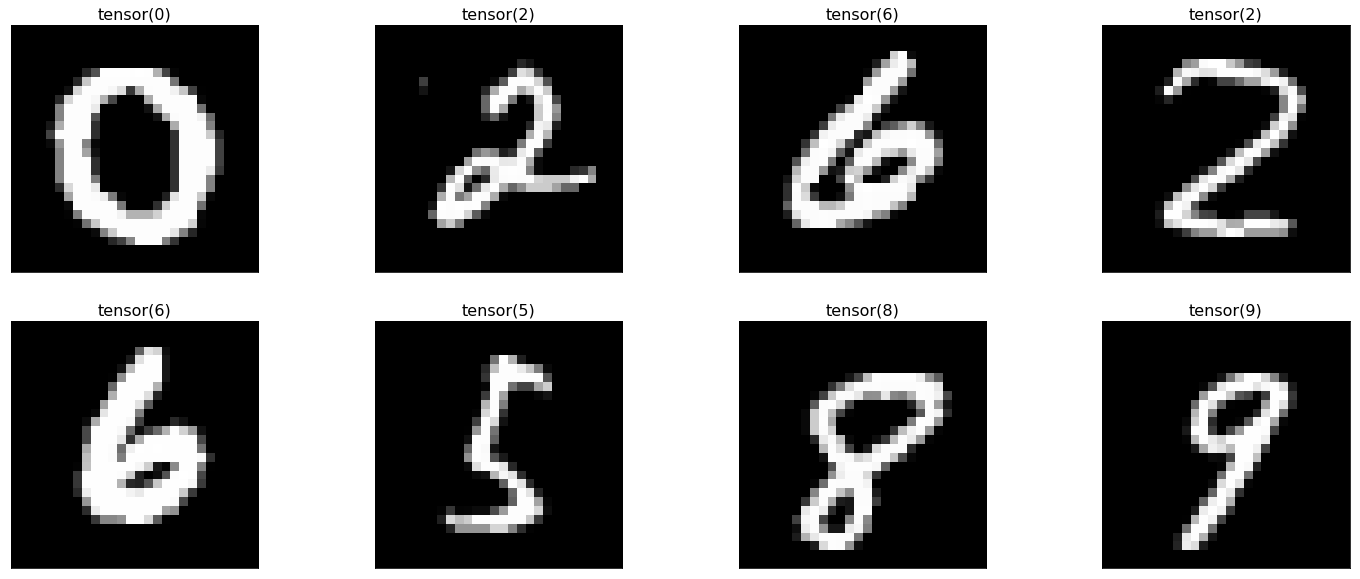

In [8]:
images, labels = iter(loader).next()
from helper import show_images
show_images(images,labels,n_rows=2)

In [9]:
images[0].shape

torch.Size([1, 28, 28])

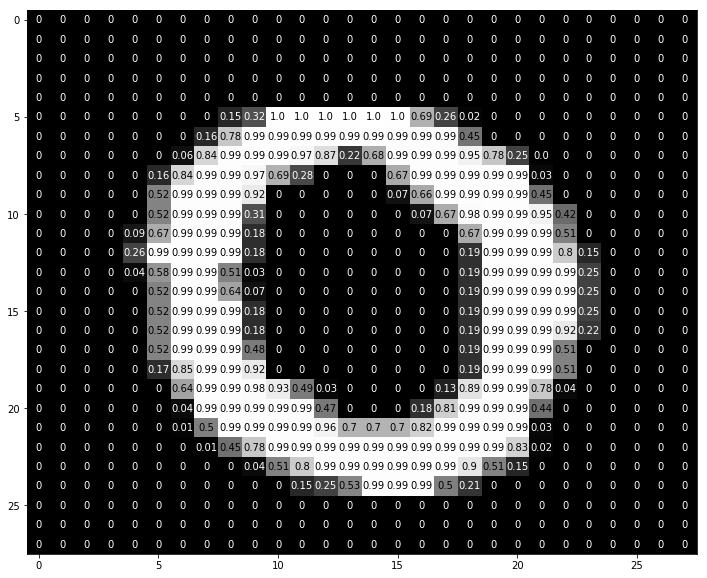

In [10]:
from helper import show_image_in_details
show_image_in_details(np.squeeze(images[0]), (12,10) )

## Network Multiclass 2 

Arquitetura da Rede Neural:
* Input Layer: 784 neurônios correspondentes a cada pixel da imagem de dimensões (28x28=784)
* Hidden Layer: 20 neurônios com função de ativação sigmoidal $f_\sigma=\frac{1}{1 + e^{-x}}$
* Output Layer: 10 neurônios com função de ativação *Softmax* $f_\gamma =\frac{e^{y_i}}{\sum_i{e^{y_i}}}$

<div align="center"><img src="img/neural_network_multiclass_2.svg" width=80%></div>

### Implementação da Rede Neural

In [11]:
class Network_Multiclass_2(nn.Module):
    def __init__(self):
        super().__init__()
        # From 784 to 20
        self.fc1 = nn.Linear(in_features=784, out_features=20)
        # From 20 to 10
        self.fc2 = nn.Linear(in_features=20, out_features=10)
        
    def forward(self, x):
        # O input passa pela primeira camada
        x = torch.sigmoid( self.fc1(x) )
        # O input passa pela segunda camada        
        x = F.softmax( self.fc2(x) , dim=1 )
        return x

In [12]:
model = Network_Multiclass_2()
model

Network_Multiclass_2(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
)

### Passando uma Imagem pela Rede Neural

A estrutura da nossa Rede Neural está definida, no entanto ainda os pesos dela não estão ajustados, o que significa que ela ainda não é boa para classificar imagens de dígitos.

Podemos testar a execução do método `forward` que implementamos na nossa classe. Esse método é o responsável por transformar os dados de entrada da imagem (os valores dos píxels) em uma saída, que será um vetor de probabilidades (devido ao uso de *softmax*) da imagem pertencer aos possíveis números.

O `x` do nosso método `forward` espera um input de dimensão $784$ mas as nossas imagens tem $28 x 28$, portanto precisamos transformar o nosso conjunto de dados, que tem o shape $(1, 1, 28, 28)$ para $(1, 784)$

In [13]:
input_data = images[0].clone().resize_(1, 784)
input_data.shape

torch.Size([1, 784])

In [14]:
output_proba = model(input_data)
output_proba

tensor([[0.1162, 0.0703, 0.1012, 0.1411, 0.1102, 0.0686, 0.0987, 0.0474, 0.0832,
         0.1630]], grad_fn=<SoftmaxBackward>)

In [15]:
[{'classe' : i, 'probabilidade': round(output_proba[0,i].detach().numpy()*100,2)} for i in range(len(output_proba[0,:]))]

[{'classe': 0, 'probabilidade': 11.62},
 {'classe': 1, 'probabilidade': 7.03},
 {'classe': 2, 'probabilidade': 10.12},
 {'classe': 3, 'probabilidade': 14.11},
 {'classe': 4, 'probabilidade': 11.02},
 {'classe': 5, 'probabilidade': 6.86},
 {'classe': 6, 'probabilidade': 9.87},
 {'classe': 7, 'probabilidade': 4.74},
 {'classe': 8, 'probabilidade': 8.32},
 {'classe': 9, 'probabilidade': 16.3}]

### Passando um Batch de Imagens pela Rede Neural

Transformação do nosso conjunto de dados, que tem o shape $(8, 1, 28, 28)$ para $(8, 784)$

In [16]:
input_data = images.clone().resize_(batch_size, 784)
input_data.shape

torch.Size([8, 784])

In [17]:
output_proba = model(input_data)
output_proba

tensor([[0.1162, 0.0703, 0.1012, 0.1411, 0.1102, 0.0686, 0.0987, 0.0474, 0.0832,
         0.1630],
        [0.1143, 0.0690, 0.1033, 0.1420, 0.1140, 0.0669, 0.0965, 0.0489, 0.0837,
         0.1613],
        [0.1162, 0.0685, 0.1055, 0.1400, 0.1140, 0.0677, 0.0945, 0.0488, 0.0844,
         0.1603],
        [0.1132, 0.0716, 0.1005, 0.1441, 0.1138, 0.0690, 0.0973, 0.0477, 0.0853,
         0.1575],
        [0.1137, 0.0697, 0.1040, 0.1422, 0.1117, 0.0675, 0.0965, 0.0491, 0.0852,
         0.1605],
        [0.1152, 0.0700, 0.1017, 0.1438, 0.1126, 0.0665, 0.0958, 0.0505, 0.0851,
         0.1587],
        [0.1143, 0.0716, 0.1013, 0.1386, 0.1147, 0.0682, 0.0988, 0.0489, 0.0842,
         0.1596],
        [0.1124, 0.0697, 0.1046, 0.1400, 0.1116, 0.0684, 0.0990, 0.0491, 0.0842,
         0.1610]], grad_fn=<SoftmaxBackward>)

In [18]:
import pandas as pd
df = pd.DataFrame(np.round(output_proba.detach().numpy()*100, 2))
df['Soma'] = np.round( df.sum(axis=1) )
df

,0,1,2,3,4,5,6,7,8,9,Soma
0,11.62,7.03,10.12,14.11,11.02,6.86,9.87,4.74,8.32,16.299999,100.0
1,11.43,6.90,10.33,14.20,11.40,6.69,9.65,4.89,8.37,16.129999,100.0
2,11.62,6.85,10.55,14.00,11.40,6.77,9.45,4.88,8.44,16.030001,100.0
3,11.32,7.16,10.05,14.41,11.38,6.90,9.73,4.77,8.53,15.750000,100.0
4,11.37,6.97,10.40,14.22,11.17,6.75,9.65,4.91,8.52,16.049999,100.0
5,11.52,7.00,10.17,14.38,11.26,6.65,9.58,5.05,8.51,15.870000,100.0
6,11.43,7.16,10.13,13.86,11.47,6.82,9.88,4.89,8.42,15.960000,100.0
7,11.24,6.97,10.46,14.00,11.16,6.84,9.90,4.91,8.42,16.100000,100.0


### Visualização das Probabilidades

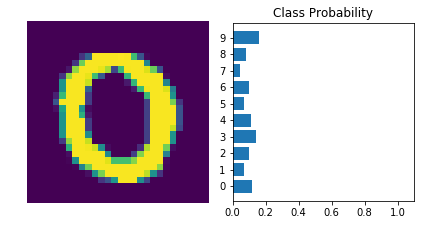

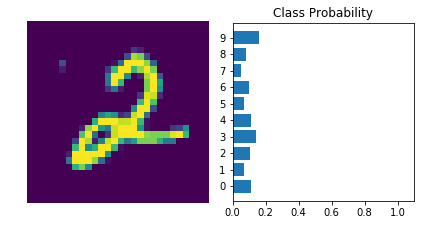

In [19]:
from helper import view_classify
view_classify(input_data[0].view(28, 28), output_proba[0,:])
view_classify(input_data[1].view(28, 28), output_proba[1,:])

O que gostaríamos é que a maior probabilidade corresponda ao número da imagem, mas isso não acontece magicamente. Para isso é necessário treinar a Rede Neural. Treinar a rede significa encontrar os valores dos pesos nas camadas de tal forma que a saída seja correta.

### Treinamento da Rede Neural

In [20]:
def train_epoch(model, trainLoader, optimizer, criterion):
    model.train()
    losses = []
    for images, labels in trainLoader:
        # (0) Prepare data
        (batch_size, _, width, height) = images.shape
        images.resize_(batch_size, width*height)
        
        optimizer.zero_grad()
        # (1) Forward
        y_pred = model(images)    
        # (2) Compute error
        loss = criterion(y_pred, labels)
        # (3) Compute gradients
        loss.backward()
        # (4) Update weights
        optimizer.step()        
        losses.append(loss.item())
        
    model.eval()
    return losses

In [21]:
batch_size = 20
loader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [22]:
from torch import nn, optim

model = Network_Multiclass_2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

#### Iteração 1

In [23]:
losses = train_epoch(model, loader, optimizer, criterion)

In [24]:
print('first 5 losses: ', np.round(losses[:5],3) )
print('last  5 losses: ', np.round(losses[(len(losses)-5):],3) )

first 5 losses:  [2.305 2.318 2.291 2.3   2.307]
last  5 losses:  [1.882 1.754 1.934 1.776 1.92 ]


In [25]:
test_images, test_labels = iter(loader).next()

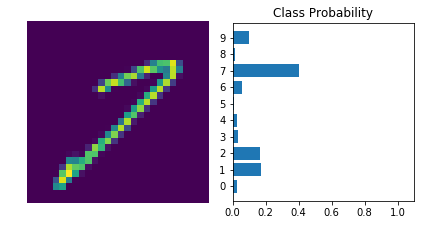

In [26]:
view_classify(test_images[7].view(28, 28), model(test_images[7].view(1,-1) ) )

#### Iteração 2

In [27]:
losses = train_epoch(model, loader, optimizer, criterion)

In [28]:
print('first 5 losses: ', np.round(losses[:5],3) )
print('last  5 losses: ', np.round(losses[(len(losses)-5):],3) )

first 5 losses:  [1.875 1.792 1.967 1.846 1.887]
last  5 losses:  [1.881 1.838 1.81  1.666 1.682]


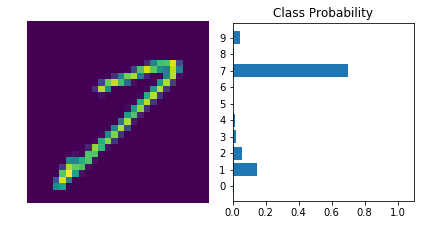

In [29]:
view_classify(test_images[7].view(28, 28), model(test_images[7].view(1,-1) ) )

#### Iteração 3:

In [30]:
losses = train_epoch(model, loader, optimizer, criterion)

In [31]:
print('first 5 losses: ', np.round(losses[:5],3) )
print('last  5 losses: ', np.round(losses[(len(losses)-5):],3) )

first 5 losses:  [1.687 1.789 1.827 1.879 1.577]
last  5 losses:  [1.701 1.838 1.673 1.697 1.762]


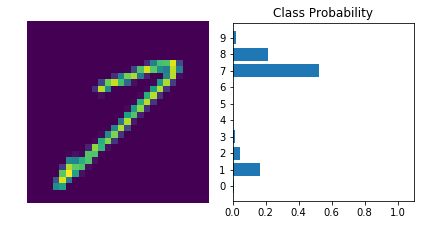

In [32]:
view_classify(test_images[7].view(28, 28), model(test_images[7].view(1,-1) ) )

### Treinamento com 10 Épocas

In [33]:
lr = 0.1
batch_size = 20
num_epochs = 10

model = Network_Multiclass_2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
loader = DataLoader(data, batch_size=batch_size)

In [34]:
from tqdm import tqdm
e_losses = []
for e in tqdm(range(num_epochs)):
    losses =  train_epoch(model, loader, optimizer, criterion)
    e_losses += [np.mean(losses)]

100%|██████████| 10/10 [01:36<00:00,  9.64s/it]


#### CrossEntropyLoss vs. Epochs

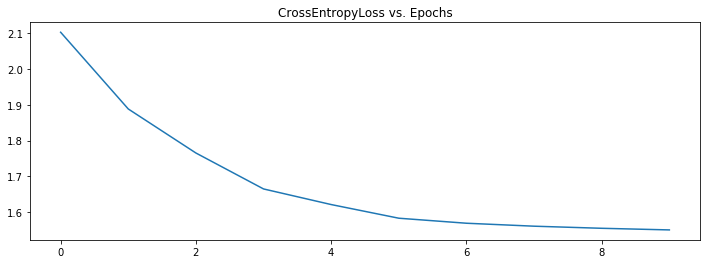

In [35]:
fig, ax = plt.subplots(figsize=(12,4))
plt.title('CrossEntropyLoss vs. Epochs')
plt.plot(e_losses)

#### Visualização de uma Classificação

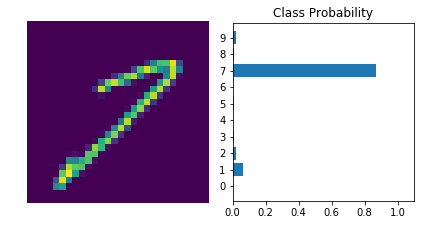

In [36]:
view_classify(test_images[7].view(28, 28), model(test_images[7].view(1,-1) ) )

#### Verificiando a Acurácia

In [37]:
def eval_model(model, loader):
    measures = []
    total = 0
    correct = 0
    for images, labels in loader:
        # (0) Prepare data
        (batch_size, _, width, height) = images.shape
        images.resize_(batch_size, width*height)
        
        # (1) Get the most probably class
        _, y_pred = torch.max(model(images),1)
        
        total += labels.size(0)
        correct += (y_pred == labels).sum().item()
        
    measures = {'acc' : correct/total}
    return measures

**No Conjunto de Treinamento**

In [38]:
results = eval_model(model, loader)
print('Acurácia no treino: {:.2f}'.format(results['acc']*100))

Acurácia no treino: 92.85


**No Conjunto de Teste**

In [39]:
data_test = datasets.MNIST(root='data',train=False,download=True,transform=transform)
testLoader = DataLoader(data_test, batch_size=batch_size)

In [40]:
results = eval_model(model, testLoader)
print('Acurácia no teste: {:.2f}'.format(results['acc']*100))

Acurácia no teste: 92.72


## Network Multiclass 3:

Arquitetura da Rede Neural:
* Input Layer: 784 neurônios correspondentes a cada pixel da imagem de dimensões (28x28=784)
* Hidden Layer 1: 40 neurônios com função de ativação sigmoidal $f_\sigma=\frac{1}{1 + e^{-x}}$
* Hidden Layer 2: 20 neurônios com função de ativação sigmoidal $f_\sigma$
* Output Layer: 10 neurônios com função de ativação *Softmax* $f_\gamma =\frac{e^{y_i}}{\sum_i{e^{y_i}}}$

<div align="center"><img src="img/neural_network_multiclass_4.svg" width=75%></div>

#### Implementação da Rede Neural

In [41]:
class Network_Multiclass_3(nn.Module):
    def __init__(self):
        super().__init__()
        # From 784 to 20
        self.fc1 = nn.Linear(in_features=784, out_features=40)
        # From 40 to 20
        self.fc2 = nn.Linear(in_features=40, out_features=20)
        # From 20 to 10
        self.fc3 = nn.Linear(in_features=20, out_features=10)
        
    def forward(self, x):
        # O input passa pela primeira camada
        x = torch.sigmoid( self.fc1(x) )
        # O input passa pela segunda camada        
        x = torch.sigmoid( self.fc2(x) )
        # O input passa pela terceira camada        
        z
        return x

#### Treinamento da Rede Neural

In [42]:
lr = 0.1
batch_size = 20
num_epochs = 10

model = Network_Multiclass_3()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
loader = DataLoader(data, batch_size=batch_size)

In [43]:
from tqdm import tqdm
e_losses = []
for e in tqdm(range(num_epochs)):
    losses =  train_epoch(model, loader, optimizer, criterion)
    e_losses += [np.mean(losses)]

100%|██████████| 10/10 [01:45<00:00, 10.87s/it]


#### CrossEntropyLoss vs. Epochs

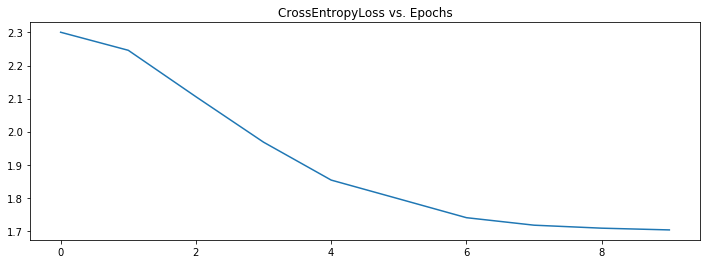

In [44]:
fig, ax = plt.subplots(figsize=(12,4))
plt.title('CrossEntropyLoss vs. Epochs')
plt.plot(e_losses)

**No Conjunto de Treinamento**

In [45]:
results = eval_model(model, loader)
print('Acurácia no treino: {:.2f}'.format(results['acc']*100))

Acurácia no treino: 76.55


**No Conjunto de Teste**

In [46]:
results = eval_model(model, testLoader)
print('Acurácia no treino: {:.2f}'.format(results['acc']*100))

Acurácia no treino: 76.39


#### Análise dos Resultados

Ao analisarmos o gráfico verificamos que em 10 iterações o `loss` da rede neural diminuiu em apenas `0.6`, de `2.3` para `1.7`.

Isso acontece quando temos muitos neurônios com função de ativação sigmoidal, pois a derivada da função de ativação sigmoidal costuma dar valores pequenos para os gradientes. Este problema é chamado de *Dissipação de Gradiente*.

Para exemplificar isso vamos construir um gráfico que simule o valor de uma combinação linear para a função de ativação sigmoidal de um neurônio. Considere intervalo `xx` de `-3` até `3`, o resultado da função de ativação sigmoidal desses dados em `yy` e o resultado da derivada da função sigmoidal em `yy_d`.

In [47]:
xx = torch.tensor( np.arange(-3, 3, 0.01) )
yy = torch.sigmoid(xx)
yy_d = torch.sigmoid(xx) * (1 - torch.sigmoid(xx))

#### Função de Ativação Sigmoidal vs sua Derivada

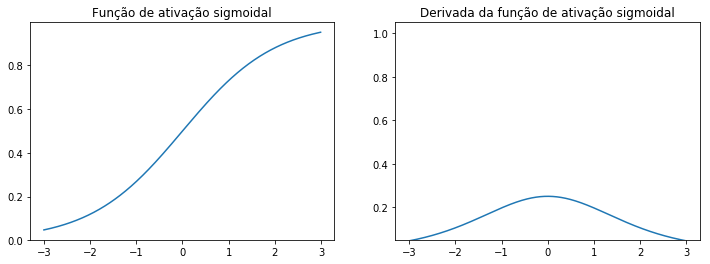

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4)); plt.ylim((0.05,1.05))
ax1.plot(xx.detach().numpy(), yy.detach().numpy())
ax1.set_title('Função de ativação sigmoidal')
ax2.plot(xx.detach().numpy(), yy_d.detach().numpy())
ax2.set_title('Derivada da função de ativação sigmoidal')
plt.show()

A derivada da função retorna vamos menores para entradas mais próximas de `-3` e `3` e valores maiores quando está próxima a `0`. Isso indica que quando a entrada para a função sigmoidal for próxima de `0` o gradiente vai ser alto para que os pesos sejam alterados com mais força e na próxima iteração o valor de entrada seja mais negativo ou mais positivo.

#### Função de Ativação Tangente Hiperbólica vs sua Derivada

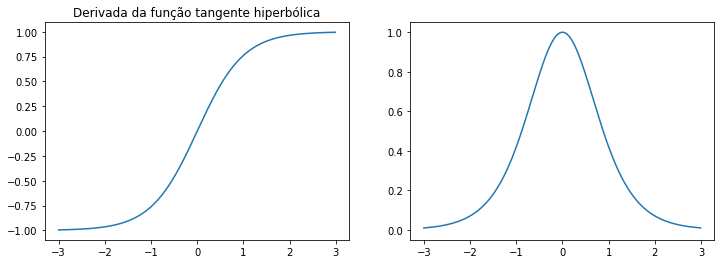

In [49]:
yy = torch.tanh(xx)
yy_d = 1.0 - np.tanh(xx)**2
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4)); plt.ylim((-0.05,1.05))
ax1.plot(xx.detach().numpy(),yy.detach().numpy())
ax1.set_title('Função de ativação tangente hiperbólica')
ax2.plot(xx.detach().numpy(),yy_d.detach().numpy())
ax1.set_title('Derivada da função tangente hiperbólica')
plt.show()

A derivada desta função retorna valores maiores do que a derivada da função sigmoidal, o que resulta em gradientes maiores e na maior alteração do valor dos pesos da rede neural.

#### Função de Ativação ReLU vs sua Derivada

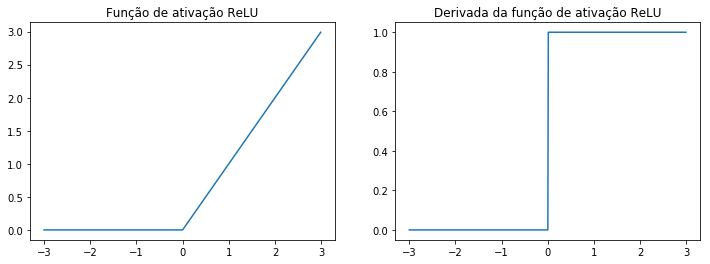

In [50]:
yy = torch.relu(xx)
yy_d = torch.tensor([1 if xi > 0 else 0 for xi in xx])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
plt.ylim((-0.05,1.05))
ax1.plot(xx.detach().numpy(),yy.detach().numpy())
ax1.set_title('Função de ativação ReLU')
ax2.plot(xx.detach().numpy(),yy_d.detach().numpy())
ax2.set_title('Derivada da função de ativação ReLU')
plt.show()

## Network Multiclass 4:

Arquitetura da Rede Neural:
* Input Layer: 784 neurônios correspondentes a cada pixel da imagem de dimensões (28x28=784)
* Hidden Layer 1: 40 neurônios com função de ativação tanh (tangente hiperbólica) $f_\sigma(x)=tan(x)$
* Hidden Layer 2: 20 neurônios com função de ativação tanh (tangente hiperbólica) $f_\sigma(x)$
* Output Layer: 10 neurônios com função de ativação *Softmax* $f_\gamma =\frac{e^{y_i}}{\sum_i{e^{y_i}}}$

<div align="center"><img src="img/neural_network_multiclass_4.svg" width=70%></div>

### Implementação da Rede Neural

In [51]:
class Network_Multiclass_4(nn.Module):
    def __init__(self):
        super().__init__()
        # From 784 to 40
        self.fc1 = nn.Linear(in_features=784, out_features=40)
        # From 40 to 20
        self.fc2 = nn.Linear(in_features=40, out_features=20)
        # From 20 to 10
        self.fc3 = nn.Linear(in_features=20, out_features=10)
        
    def forward(self, x):
        # O input passa pela primeira camada
        x = torch.tanh( self.fc1(x) )
        # O input passa pela segunda camada
        x = torch.tanh( self.fc2(x) )
        # O input passa pela terceira camada
        x = F.softmax( self.fc3(x) , dim=1 )
        return x

In [52]:
lr = 0.1
batch_size = 20
num_epochs = 10

model = Network_Multiclass_4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
loader = DataLoader(data, batch_size=batch_size)

In [53]:
e_losses = []
progress = tqdm(range(num_epochs))
for e in progress:
    losses =  train_epoch(model, loader, optimizer, criterion)
    e_losses += [np.mean(losses)]    

100%|██████████| 10/10 [01:44<00:00, 10.56s/it]


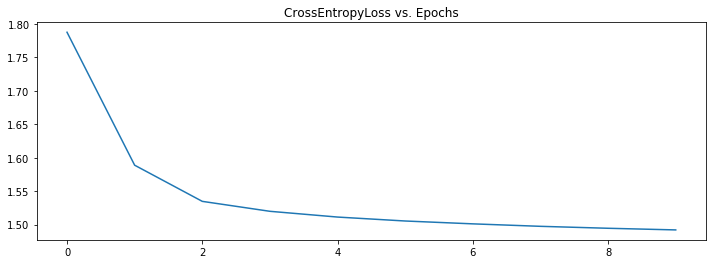

In [54]:
fig, ax = plt.subplots(figsize=(12,4))
plt.title('CrossEntropyLoss vs. Epochs')
plt.plot(e_losses)

**No Conjunto de Treinamento**

In [55]:
results = eval_model(model, loader)
print('Acurácia no treino: {:.2f}'.format(results['acc']*100))

Acurácia no treino: 97.38


**No Conjunto de Teste**

In [56]:
results = eval_model(model, testLoader)
print('Acurácia no treino: {:.2f}'.format(results['acc']*100))

Acurácia no treino: 96.17


## Network Multiclass 5:

Arquitetura da Rede Neural:
* Input Layer: 784 neurônios correspondentes a cada pixel da imagem de dimensões (28x28=784)
* Hidden Layer 1: 40 neurônios com função de ativação ReLU $f_\sigma(x)=ReLU(x)$
* Hidden Layer 2: 20 neurônios com função de ativação ReLU $f_\sigma(x)$
* Output Layer: 10 neurônios com função de ativação *Softmax* $f_\gamma =\frac{e^{y_i}}{\sum_i{e^{y_i}}}$

<div align="center"><img src="img/neural_network_multiclass_4.svg" width=70%></div>

### Implementação da Rede Neural

In [57]:
class Network_Multiclass_5(nn.Module):
    def __init__(self):
        super().__init__()
        # From 784 to 40
        self.fc1 = nn.Linear(in_features=784, out_features=40)
        # From 40 to 20
        self.fc2 = nn.Linear(in_features=40, out_features=20)
        # From 20 to 10
        self.fc3 = nn.Linear(in_features=20, out_features=10)
        
    def forward(self, x):
        # O input passa pela primeira camada
        x = torch.relu( self.fc1(x) )
        # O input passa pela segunda camada
        x = torch.relu( self.fc2(x) )
        # O input passa pela terceira camada  
        x = F.softmax( self.fc3(x) , dim=1 )
        return x

In [58]:
lr = 0.1
batch_size = 20
num_epochs = 10

model = Network_Multiclass_5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
loader = DataLoader(data, batch_size=batch_size)

In [59]:
e_losses = []
progress = tqdm(range(num_epochs))
for e in progress:
    losses =  train_epoch(model, loader, optimizer, criterion)
    e_losses += [np.mean(losses)]    

100%|██████████| 10/10 [01:47<00:00, 10.78s/it]


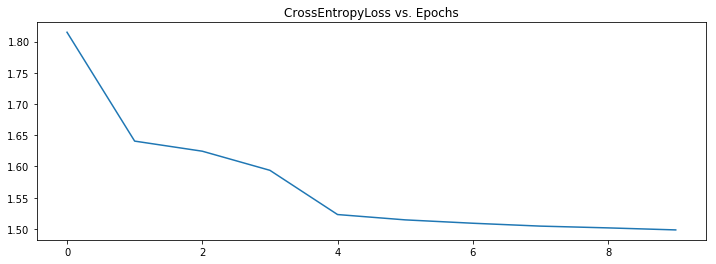

In [60]:
fig, ax = plt.subplots(figsize=(12,4))
plt.title('CrossEntropyLoss vs. Epochs')
plt.plot(e_losses)

**No Conjunto de Treinamento**

In [61]:
results = eval_model(model, loader)
print('Acurácia no treino: {:.2f}'.format(results['acc']*100))

Acurácia no treino: 96.32


**No Conjunto de Teste**

In [62]:
results = eval_model(model, testLoader)
print('Acurácia no treino: {:.2f}'.format(results['acc']*100))

Acurácia no treino: 95.78


### Mostrando Acurácia de Treino e Teste Durante o Treinamento

In [63]:
data_train = datasets.MNIST(root='data',train=True,download=True,transform=transform)
data_test  = datasets.MNIST(root='data',train=False,download=True,transform=transform)

In [64]:
batch_size = 20
trainLoader = DataLoader(data_train, batch_size=batch_size)
testLoader  = DataLoader(data_test , batch_size=batch_size)

In [65]:
lr = 0.1
num_epochs = 10

model = Network_Multiclass_5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [66]:
e_measures = []
for e in range(num_epochs):
    losses =  train_epoch(model, trainLoader, optimizer, criterion)    
    measures_on_train = eval_model(model, trainLoader)
    measures_on_test  = eval_model(model, testLoader )
    measures = {'epoch': e, 'train_loss': round(np.mean(losses),3), 'train_acc' : round(measures_on_train['acc'],3), 'test_acc' : round(measures_on_test['acc'],3) }    
    print(measures)
    e_measures += [measures]

{'epoch': 0, 'train_loss': 1.845, 'train_acc': 0.802, 'test_acc': 0.805}
{'epoch': 1, 'train_loss': 1.632, 'train_acc': 0.836, 'test_acc': 0.837}
{'epoch': 2, 'train_loss': 1.615, 'train_acc': 0.846, 'test_acc': 0.846}
{'epoch': 3, 'train_loss': 1.608, 'train_acc': 0.858, 'test_acc': 0.857}
{'epoch': 4, 'train_loss': 1.601, 'train_acc': 0.863, 'test_acc': 0.859}
{'epoch': 5, 'train_loss': 1.596, 'train_acc': 0.869, 'test_acc': 0.862}
{'epoch': 6, 'train_loss': 1.593, 'train_acc': 0.872, 'test_acc': 0.866}
{'epoch': 7, 'train_loss': 1.59, 'train_acc': 0.875, 'test_acc': 0.87}
{'epoch': 8, 'train_loss': 1.587, 'train_acc': 0.876, 'test_acc': 0.871}
{'epoch': 9, 'train_loss': 1.584, 'train_acc': 0.879, 'test_acc': 0.872}


**Resultados**

In [67]:
pd.DataFrame(e_measures)

,epoch,test_acc,train_acc,train_loss
0,0,0.805,0.802,1.845
1,1,0.837,0.836,1.632
2,2,0.846,0.846,1.615
3,3,0.857,0.858,1.608
4,4,0.859,0.863,1.601
5,5,0.862,0.869,1.596
6,6,0.866,0.872,1.593
7,7,0.870,0.875,1.590
8,8,0.871,0.876,1.587
9,9,0.872,0.879,1.584


# Atividade

* Explorar o conjunto de dados Fashion MNIST
* Construir 5 modelos de redes neurais para classificar as imagens desse conjunto. Explorar:
    * Número de neurônios nas camadas
    * Número de hidden layers
    * Funções de ativação nas hidden layers
    * Número de épocas de treinamento
* Para cada modelo mostrar:
    * Um gráfico de *CrossEntropyLoss* vs Epochs
    * Um gráfico de *Accuracy on Train and Test* vs Epochs
    * A acurácia final no conjunto de treino e teste